#Лабораторная работа №2: Кластеризация методом k-средних

In [2]:
#Импортируем нужные библиотеки
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import preprocessing

import os

In [3]:
#Читаем данные
data = './Econom_Cities_data.csv'
df = pd.read_csv(data, sep=';', decimal=',',  index_col='City')
df.head(10)

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


In [4]:
#Имея информацию из предыдущей лабы удалим выбросы
clean_df = df.drop(['Jakarta', 'Cairo'])

Стандартизируем данные, как в предыдущей лабораторной работе

In [5]:
std = preprocessing.StandardScaler()
std.fit(clean_df)
std_df = std.transform(clean_df)
std_df = pd.DataFrame(std_df, index = clean_df.index, columns = clean_df.columns)
std_df.head(10)

,Work,Price,Salary
City,,,
Amsterdam,-0.962166,-0.212712,0.386095
Athens,-0.509827,-0.770489,-0.373488
Bogota,1.577891,-1.522069,-1.145323
Bombay,0.997969,-1.881316,-1.398517
Brussels,-0.996961,0.174896,0.447351
Buenos_Aires,0.528233,-0.661769,-1.104485
Caracas,0.934178,-0.430150,-1.169825
Chicago,0.255670,0.179623,0.912902
Copenhagen,-0.944768,1.002108,0.953740


Данные подготовлены, дальше определим числа кластеров

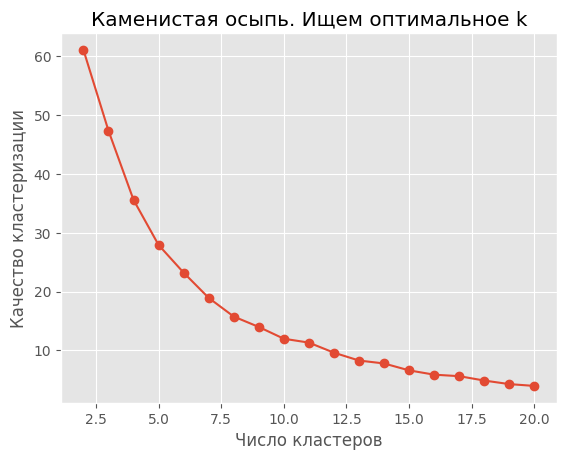

In [6]:
K = range(2, 21)

# Сохраняем модель
models = [KMeans(n_clusters = k, random_state = 42, n_init=10, verbose=0).fit(std_df) for k in K]

# Качество кластеризации вычисляется в model.inertia_
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')

plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Смотря на график каменистой осыпи, можно сделать вывод, что оптимальное количество кластеров 4 или пять. Далее для анализа посмотрим два варианта.

##Рассмотрим вариант для 4 кластеров

In [13]:
model = KMeans(n_clusters=4, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(clean_df)
clean_df['cluster'] = model.labels_
clean_df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,2221.400000,53.900000,17.540000
1,1826.428571,75.021429,49.492857
2,1996.769231,60.238462,27.715385
3,1702.928571,80.121429,48.442857


In [16]:
clean_df.groupby('cluster').size()

,0
cluster,
0,5
1,14
2,13
3,14


Вывод:
1. Кластер №0 - люди в этих городах много работают, мало зарабатывают, относительно зарплат имеют высокие цены на "жизнь";
2. Кластер №1 - хороший баланс зарплат, рабочего времени и цен, относительно других городов, в этих городах в среднем получают больше, чем в остальных;
3. Кластер №2 - средние города, где люди работаю не много, но и не мало, зарплата у них также небольшая, но и не маленькая, однако цены на жизнь больше половины заработной платы;
4. Кластер №3 - предположительно самые благоприятные города, где люди работают немного относительно других, получают одни из самых высоких зарплат(в анализируемых городах), цены на жизнь хоть и высокие, но по отношению к ЗП нормальны.

##Теперь рассмотрим вариант с 5-ю кластерами

In [17]:
model = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(clean_df)
clean_df['cluster'] = model.labels_
clean_df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,1684.700000,86.160000,56.160000
1,2084.444444,57.522222,21.577778
2,1925.272727,73.836364,48.954545
3,2321.500000,51.900000,15.900000
4,1789.142857,66.378571,35.214286


In [18]:
clean_df.groupby('cluster').size()

,0
cluster,
0,10
1,9
2,11
3,2
4,14


Вывод: с появлением 5-го кластера, выделяется кластер №3, в который входит всего два города. Про них можно сказать, что они не благоприятные для проживания, так как самый высокий показатель по рабочим часам при этом с самыми низкими зарплатами и высокими ценами на жизнь.